# Multple Linear Regression

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import feature_selection
from sklearn.linear_model import LinearRegression

In [2]:
data = pd.read_csv('colleges.csv', index_col=0)
data.head()

,Type,MedianSAT,AcceptanceRate,ExpendituresPerStudent,Top10PercentHS,GraduationPercent
School,,,,,,
Amherst,Lib Arts,1315,0.22,26636,85,93
Barnard,Lib Arts,1220,0.53,17653,69,80
Bates,Lib Arts,1240,0.36,17554,58,88
Berkeley,University,1176,0.37,23665,95,68
Bowdoin,Lib Arts,1300,0.24,25703,78,90


In [3]:
data = pd.read_csv('colleges.csv', index_col=0)
data.head()

,Type,MedianSAT,AcceptanceRate,ExpendituresPerStudent,Top10PercentHS,GraduationPercent
School,,,,,,
Amherst,Lib Arts,1315,0.22,26636,85,93
Barnard,Lib Arts,1220,0.53,17653,69,80
Bates,Lib Arts,1240,0.36,17554,58,88
Berkeley,University,1176,0.37,23665,95,68
Bowdoin,Lib Arts,1300,0.24,25703,78,90


In [4]:
data = data.drop('Type', axis=1)
independent = data.drop('GraduationPercent', axis=1)

Input = independent.values
Output = data.GraduationPercent.values

                        MedianSAT  AcceptanceRate  ExpendituresPerStudent  \
MedianSAT                1.000000       -0.601902                0.572742   
AcceptanceRate          -0.601902        1.000000               -0.284254   
ExpendituresPerStudent   0.572742       -0.284254                1.000000   
Top10PercentHS           0.503468       -0.609721                0.505782   
GraduationPercent        0.564147       -0.550378                0.042504   

                        Top10PercentHS  GraduationPercent  
MedianSAT                     0.503468           0.564147  
AcceptanceRate               -0.609721          -0.550378  
ExpendituresPerStudent        0.505782           0.042504  
Top10PercentHS                1.000000           0.138613  
GraduationPercent             0.138613           1.000000  


<AxesSubplot:>

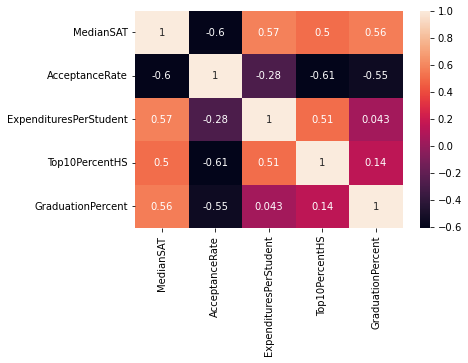

In [5]:
cor = data.corr()
print(cor)

import seaborn as sb

sb.heatmap(cor, annot=True)

# Feature Selection

In [6]:
feature_selection.f_regression(Input, Output, center=True)

(array([21.94140465, 20.42366744,  0.08506146,  0.92072345]),
 array([2.42598392e-05, 4.18443571e-05, 7.71835390e-01, 3.42195517e-01]))

In [7]:
data.head()

,MedianSAT,AcceptanceRate,ExpendituresPerStudent,Top10PercentHS,GraduationPercent
School,,,,,
Amherst,1315,0.22,26636,85,93
Barnard,1220,0.53,17653,69,80
Bates,1240,0.36,17554,58,88
Berkeley,1176,0.37,23665,95,68
Bowdoin,1300,0.24,25703,78,90


In [8]:
model = LinearRegression(fit_intercept=True)

selector = feature_selection.RFE(model, n_features_to_select=3, step=1)
selector = selector.fit(Input, Output)
selector.support_

array([ True,  True, False,  True])

In [24]:
selector.ranking_

array([1, 1, 2, 1])

# So !
        From the above feature selection we could take { 1, 1, 0, 1 }

In [9]:
independent.head()

,MedianSAT,AcceptanceRate,ExpendituresPerStudent,Top10PercentHS
School,,,,
Amherst,1315,0.22,26636,85
Barnard,1220,0.53,17653,69
Bates,1240,0.36,17554,58
Berkeley,1176,0.37,23665,95
Bowdoin,1300,0.24,25703,78


In [10]:
selected_feature = independent.drop('ExpendituresPerStudent', axis=1)
Input = selected_feature.values


In [56]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(Input, Output, random_state=1, test_size=0.2)

In [12]:
model.fit(x_train, y_train)


LinearRegression()

In [13]:
prediction = model.predict(x_test)

In [14]:
y_test

array([77, 88, 88, 93, 88, 68, 84, 80, 86, 93])

In [15]:
prediction

array([80.14511424, 88.93086308, 80.39156742, 89.80011231, 86.25581583,
       73.93863886, 88.00641247, 86.69359702, 78.97412941, 90.04716322])

In [23]:
from sklearn.metrics import accuracy_score
# from sklearn.metrics import eva

# loss , accuracy = model.eva

In [17]:

from sklearn.model_selection import cross_val_score

cross_val_score(model, x_test, y_test, cv=3)


array([ 0.16905593, -6.38111016, -0.83237643])

Text(0, 0.5, 'Residual')

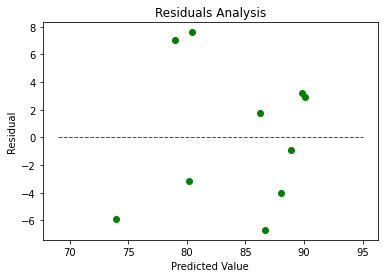

In [18]:
# Residuals plot
# Difference between observed response and filtered response

residuals = y_test - prediction


plt.figure(0)
plt.title('Residuals Analysis')
plt.scatter(prediction, residuals,  color='green')
plt.plot([69, 95], [0, 0], color='red', linestyle='--', linewidth=1)
plt.xlabel('Predicted Value')
plt.ylabel('Residual')

((array([-1.49876728, -0.98494667, -0.64703803, -0.37109819, -0.12121409,
          0.12121409,  0.37109819,  0.64703803,  0.98494667,  1.49876728]),
  array([-6.69359702, -5.93863886, -4.00641247, -3.14511424, -0.93086308,
          1.74418417,  2.95283678,  3.19988769,  7.02587059,  7.60843258])),
 (5.472585543469342, 0.18165861416785123, 0.9808632702210117))

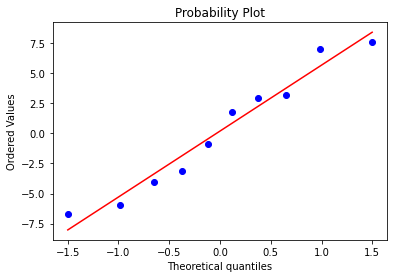

In [19]:
import scipy.stats as stats
stats.probplot(residuals, dist="norm", plot=plt)

In [39]:
data.head()

,MedianSAT,AcceptanceRate,ExpendituresPerStudent,Top10PercentHS,GraduationPercent
School,,,,,
Amherst,1315,0.22,26636,85,93
Barnard,1220,0.53,17653,69,80
Bates,1240,0.36,17554,58,88
Berkeley,1176,0.37,23665,95,68
Bowdoin,1300,0.24,25703,78,90


In [45]:
from statsmodels.stats.outliers_influence import variance_inflation_factor


vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(independent.values, i) for i in range(independent.shape[1])]
vif["features"] = independent.columns
vif.round(1)
vif

,VIF Factor,features
0,81.815558,MedianSAT
1,10.431692,AcceptanceRate
2,6.444369,ExpendituresPerStudent
3,57.034010,Top10PercentHS


# Mathematical evaluation

In [48]:
print('Coefficent of the model : ',model.coef_)

Coefficent of the model :  [  0.05514146 -28.43164495  -0.22983262]


In [49]:
print('Intercept of the model : ',model.intercept_)

Intercept of the model :  41.44608814155297


In [52]:
print('R^2 of the model : ', model.score(x_test, y_test))

R^2 of the model :  0.5565576119594635


In [54]:
import math
from sklearn.metrics import mean_squared_error
T_pred = model.predict(x_test)

print('Root Mean Square ', math.sqrt(mean_squared_error(y_test, T_pred)))

Root Mean Square  4.859352545675049


In [57]:
x = independent
y = data.GraduationPercent

model = LinearRegression(x_train, y_train)

TypeError: __init__() takes 1 positional argument but 3 were given